In [1]:
import pandas as pd
import json
import os 
import sys
import csv

# plot
import matplotlib.pyplot as plt
import seaborn as sns

### global variables for running the code

In [2]:
run_timesteps = 20000

In [3]:
# dir = os.path.join('dataset', 'kaggle-dse')
# dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/NIFTY"

if os.name == 'nt':  # Windows
    dir = r"D:\Academics\4-2\19 Batch\Sessionals\CSE 472\Project\1905095_1905115\Github\Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models\datasets\NIFTY"
else:  # macOS/Linux
    dir = r"/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/Strategic-Stock-Trading-with-Deep-Reinforcement-Learning-Models/datasets/NIFTY"


files = os.listdir(dir)
files.sort()
files = [f for f in files]
print(files)

['ADANIPORTS.csv', 'ASIANPAINT.csv', 'AXISBANK.csv', 'BAJAJ-AUTO.csv', 'BAJAJFINSV.csv', 'BAJFINANCE.csv', 'BHARTIARTL.csv', 'BPCL.csv', 'BRITANNIA.csv', 'CIPLA.csv', 'COALINDIA.csv', 'DRREDDY.csv', 'EICHERMOT.csv', 'GAIL.csv', 'GRASIM.csv', 'HCLTECH.csv', 'HDFC.csv', 'HDFCBANK.csv', 'HEROMOTOCO.csv', 'HINDALCO.csv', 'HINDUNILVR.csv', 'ICICIBANK.csv', 'INDUSINDBK.csv', 'INFRATEL.csv', 'INFY.csv', 'IOC.csv', 'ITC.csv', 'JSWSTEEL.csv', 'KOTAKBANK.csv', 'LT.csv', 'MARUTI.csv', 'MM.csv', 'NESTLEIND.csv', 'NIFTY50_all.csv', 'NTPC.csv', 'ONGC.csv', 'POWERGRID.csv', 'RELIANCE.csv', 'SBIN.csv', 'SHREECEM.csv', 'SUNPHARMA.csv', 'TATAMOTORS.csv', 'TATASTEEL.csv', 'TCS.csv', 'TECHM.csv', 'TITAN.csv', 'ULTRACEMCO.csv', 'UPL.csv', 'VEDL.csv', 'WIPRO.csv', 'ZEEL.csv', 'stock_metadata.csv']


In [4]:
# List to store the data from all CSV files
data = []

# Loop through the files
for f in files:
    # Load each CSV file into a DataFrame and append to the list
    file_path = os.path.join(dir, f)
    data.append(pd.read_csv(file_path))

# Check the number of loaded CSV files
len(data)

52

In [5]:
# convert to pandas dataframe
dfs = []
for i in range(1,len(data)):
    dfs.append(pd.DataFrame(data[i]))
df = pd.concat(dfs)

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_35344/1561586728.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(dfs)


In [6]:
df.shape

(467112, 18)

In [7]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2000-01-03,ASIANPAINT,EQ,361.20,370.0,390.0,370.0,385.0,381.65,380.54,3318.0,1.262617e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,ASIANPAINT,EQ,381.65,380.0,392.0,375.0,390.0,385.55,383.50,4818.0,1.847699e+11,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,ASIANPAINT,EQ,385.55,371.5,390.0,371.5,383.0,383.00,379.81,2628.0,9.981384e+10,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,ASIANPAINT,EQ,383.00,384.9,384.9,374.5,375.1,377.50,379.88,3354.0,1.274114e+11,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,ASIANPAINT,EQ,377.50,376.0,390.0,370.0,389.0,385.70,383.38,9589.0,3.676275e+11,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,NaN,ULTRACEMCO,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UltraTech Cement Ltd.,CEMENT & CEMENT PRODUCTS,INE481G01011
46,NaN,UPL,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPL Ltd.,FERTILISERS & PESTICIDES,INE628A01036
47,NaN,VEDL,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Vedanta Ltd.,METALS,INE205A01025
48,NaN,WIPRO,EQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wipro Ltd.,IT,INE075A01022


In [8]:
df.drop(['Series', 'Prev Close', 'Last', 'VWAP','Turnover','Trades','Deliverable Volume','%Deliverble','Company Name','Industry','ISIN Code'], axis=1, inplace=True)


In [9]:
df

,Date,Symbol,Open,High,Low,Close,Volume
0,2000-01-03,ASIANPAINT,370.0,390.0,370.0,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.0,392.0,375.0,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.5,390.0,371.5,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.9,384.9,374.5,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.0,390.0,370.0,385.70,9589.0
...,...,...,...,...,...,...,...
45,NaN,ULTRACEMCO,NaN,NaN,NaN,NaN,NaN
46,NaN,UPL,NaN,NaN,NaN,NaN,NaN
47,NaN,VEDL,NaN,NaN,NaN,NaN,NaN
48,NaN,WIPRO,NaN,NaN,NaN,NaN,NaN


In [10]:
df.rename(columns={'Date':'date', 'Symbol': 'tic', 'Open': 'open', 'High':'high', 'Low':'low', 'Close': 'close', 'Volume':'volume'}, inplace=True)


In [11]:
df

,date,tic,open,high,low,close,volume
0,2000-01-03,ASIANPAINT,370.0,390.0,370.0,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.0,392.0,375.0,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.5,390.0,371.5,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.9,384.9,374.5,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.0,390.0,370.0,385.70,9589.0
...,...,...,...,...,...,...,...
45,NaN,ULTRACEMCO,NaN,NaN,NaN,NaN,NaN
46,NaN,UPL,NaN,NaN,NaN,NaN,NaN
47,NaN,VEDL,NaN,NaN,NaN,NaN,NaN
48,NaN,WIPRO,NaN,NaN,NaN,NaN,NaN


In [12]:
df.shape

(467112, 7)

In [13]:
# count the unique values in the column
df = df.drop_duplicates(subset=['date', 'tic'])
df.shape

(235242, 7)

In [14]:
df = df.dropna(subset=['date', 'tic'])
df.shape

(235192, 7)

In [15]:
df

,date,tic,open,high,low,close,volume
0,2000-01-03,ASIANPAINT,370.0,390.00,370.00,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.0,392.00,375.00,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.5,390.00,371.50,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.9,384.90,374.50,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.0,390.00,370.00,385.70,9589.0
...,...,...,...,...,...,...,...
235187,2021-04-26,ZEEL,190.6,191.10,185.10,186.40,8542755.0
235188,2021-04-27,ZEEL,188.0,192.95,186.80,188.15,14247767.0
235189,2021-04-28,ZEEL,188.8,190.60,187.10,189.10,8429439.0
235190,2021-04-29,ZEEL,190.8,191.65,186.00,186.55,9483009.0


In [16]:
nan_counts = df.isna().sum()
print(nan_counts)


date      0
tic       0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [17]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date      0
tic       0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [18]:
df['tic'].value_counts()

tic
ASIANPAINT    5306
HDFCBANK      5306
SUNPHARMA     5306
GRASIM        5306
SBIN          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: count, Length: 65, dtype: int64

In [19]:
import pandas as pd

# Get the value counts of the 'tic' column
tic_counts = df['tic'].value_counts(dropna=False)

# Convert the counts to a DataFrame
tic_counts_df = tic_counts.reset_index()
tic_counts_df.columns = ['Tic', 'Count']

# Save the DataFrame to a CSV file
# tic_counts_df.to_csv('tic_value_counts.csv', index=False)

print(tic_counts)


tic
ASIANPAINT    5306
HDFCBANK      5306
SUNPHARMA     5306
GRASIM        5306
SBIN          5306
              ... 
MUNDRAPORT    1023
TELCO          999
KOTAKMAH       502
SSLT           388
JSWSTL         123
Name: count, Length: 65, dtype: int64


In [20]:
# Get the top 30 most frequent 'tic' values
top_30_tics = tic_counts.nlargest(30).index

# Filter the DataFrame to keep only these top 30 'tic' values
df_filtered = df[df['tic'].isin(top_30_tics)]

df = df_filtered.reset_index(drop=True)
# Display the filtered DataFrame
print(df)


              date         tic    open    high     low   close      volume
0       2000-01-03  ASIANPAINT  370.00  390.00  370.00  381.65      3318.0
1       2000-01-04  ASIANPAINT  380.00  392.00  375.00  385.55      4818.0
2       2000-01-05  ASIANPAINT  371.50  390.00  371.50  383.00      2628.0
3       2000-01-06  ASIANPAINT  384.90  384.90  374.50  377.50      3354.0
4       2000-01-07  ASIANPAINT  376.00  390.00  370.00  385.70      9589.0
...            ...         ...     ...     ...     ...     ...         ...
150826  2021-04-26       WIPRO  479.40  483.85  477.00  480.30   9314644.0
150827  2021-04-27       WIPRO  481.40  487.00  481.00  485.05   7209467.0
150828  2021-04-28       WIPRO  485.85  493.20  481.25  489.30   9615534.0
150829  2021-04-29       WIPRO  492.70  492.80  485.70  489.85   7641133.0
150830  2021-04-30       WIPRO  491.50  511.80  489.30  492.75  29115571.0

[150831 rows x 7 columns]


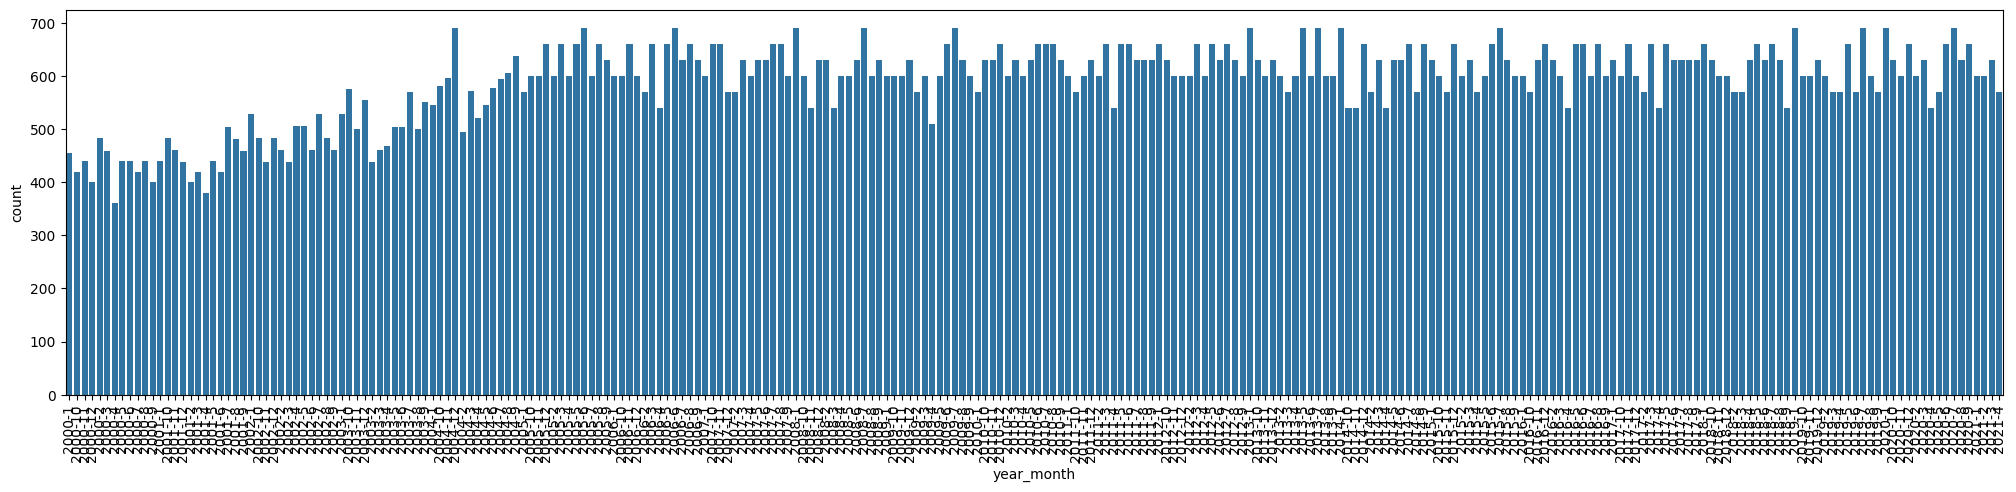

In [21]:
# per year minimum number of trading days
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a new column 'year_month' for plotting
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

plt.figure(figsize=(25, 5))
sns.countplot(x='year_month', data=df, order=sorted(df['year_month'].unique()))
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()

In [22]:
df['year'].value_counts()

year
2010    7560
2020    7560
2005    7530
2012    7530
2006    7500
2013    7500
2007    7470
2017    7440
2015    7440
2016    7410
2011    7410
2008    7380
2018    7380
2019    7350
2014    7320
2009    7289
2004    6959
2003    6150
2002    5773
2001    5324
2000    5156
2021    2400
Name: count, dtype: int64

In [23]:
import pandas as pd

# Ensure 'date' is properly converted to datetime
df['date'] = pd.to_datetime(df['date'])

# Create an empty DataFrame to store the sampled data
sampled_data = pd.DataFrame()

# Group the data by year
grouped_data = df.groupby('year')

# Sample days dynamically based on the number of unique days available in each year
for year, group in grouped_data:
    # Get the unique dates available for sampling
    unique_days = group['date'].nunique()
    print('ud '+ str(year)+ ' ' + str(unique_days))
    
    # Adjust the sample size based on the number of unique days
    sample_size = min(208, unique_days)  # Use smaller of 208 or the number of unique days
    
    # Sample unique days
    sampled_days = group['date'].sample(sample_size, replace=False)
    

    print('ss '+ str(year)+ ' ' + str(sample_size))

    # Filter the data for the sampled days
    sampled_year_data = group[group['date'].isin(sampled_days)]
    
    # Ensure each sampled day includes all 30 trading codes
    sampled_year_data = sampled_year_data.groupby('date').filter(lambda x: len(x) == 30)
    
    # Append the sampled data to the final DataFrame
    sampled_data = pd.concat([sampled_data, sampled_year_data])

# Reset index of the final sampled data
sampled_data.reset_index(drop=True, inplace=True)

print(len(sampled_data))


ud 2000 250
ss 2000 208
ud 2001 248
ss 2001 208
ud 2002 251
ss 2002 208
ud 2003 254
ss 2003 208
ud 2004 254
ss 2004 208
ud 2005 251
ss 2005 208
ud 2006 250
ss 2006 208
ud 2007 249
ss 2007 208
ud 2008 246
ss 2008 208
ud 2009 243
ss 2009 208
ud 2010 252
ss 2010 208
ud 2011 247
ss 2011 208
ud 2012 251
ss 2012 208
ud 2013 250
ss 2013 208
ud 2014 244
ss 2014 208
ud 2015 248
ss 2015 208
ud 2016 247
ss 2016 208
ud 2017 248
ss 2017 208
ud 2018 246
ss 2018 208
ud 2019 245
ss 2019 208
ud 2020 252
ss 2020 208
ud 2021 80
ss 2021 80
70560


In [24]:
# Count zeros in the 'Volume' column
zero_count_volume = (df['volume'] == 0).sum()

print("Number of zeros in 'Volume' column:", zero_count_volume)


Number of zeros in 'Volume' column: 0


In [25]:
# print the zero count of each column
zero_counts = df.apply(lambda x: (x==0).sum())
print(zero_counts)

date          0
tic           0
open          0
high          0
low           0
close         0
volume        0
year          0
month         0
year_month    0
dtype: int64


In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from stable_baselines3.common.logger import configure
from finrl.meta.data_processor import DataProcessor

from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from pprint import pprint

import sys
sys.path.append("../FinRL")

import itertools

from finrl import config
from finrl import config_tickers
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)
check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

/Users/md.raihansobhan/Desktop/BUET/4-2 Sessionals/CSE 472 | ML/online_class/ml/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [27]:
df.head()

,date,tic,open,high,low,close,volume,year,month,year_month
0,2000-01-03,ASIANPAINT,370.0,390.0,370.0,381.65,3318.0,2000,1,2000-1
1,2000-01-04,ASIANPAINT,380.0,392.0,375.0,385.55,4818.0,2000,1,2000-1
2,2000-01-05,ASIANPAINT,371.5,390.0,371.5,383.00,2628.0,2000,1,2000-1
3,2000-01-06,ASIANPAINT,384.9,384.9,374.5,377.50,3354.0,2000,1,2000-1
4,2000-01-07,ASIANPAINT,376.0,390.0,370.0,385.70,9589.0,2000,1,2000-1


In [28]:
df.drop(['year_month','month','year'], axis=1, inplace=True)


In [29]:
df

,date,tic,open,high,low,close,volume
0,2000-01-03,ASIANPAINT,370.00,390.00,370.00,381.65,3318.0
1,2000-01-04,ASIANPAINT,380.00,392.00,375.00,385.55,4818.0
2,2000-01-05,ASIANPAINT,371.50,390.00,371.50,383.00,2628.0
3,2000-01-06,ASIANPAINT,384.90,384.90,374.50,377.50,3354.0
4,2000-01-07,ASIANPAINT,376.00,390.00,370.00,385.70,9589.0
...,...,...,...,...,...,...,...
150826,2021-04-26,WIPRO,479.40,483.85,477.00,480.30,9314644.0
150827,2021-04-27,WIPRO,481.40,487.00,481.00,485.05,7209467.0
150828,2021-04-28,WIPRO,485.85,493.20,481.25,489.30,9615534.0
150829,2021-04-29,WIPRO,492.70,492.80,485.70,489.85,7641133.0


In [30]:
# Assuming 'df' is your DataFrame and 'close' is the column with closing prices
std_dev = df.groupby('tic')['close'].std()

plt.figure(figsize=(10,6))
sns.histplot(std_dev, bins=50, kde=True)
plt.title('Distribution of std of the stocks')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
if os.name == 'nt':  # Windows
    # plt.savefig('Output\std_dev.png')
    do_nothing = 1
else:
    plt.savefig('Output/output_nifty.png')
plt.show()

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_35344/3718713872.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [31]:
df['day'] = pd.to_datetime(df['date']).dt.dayofweek
df['short_resistance']= df['high'].rolling(window=10,min_periods=0).max()
df['short_support']= df['low'].rolling(window=10,min_periods=0).min()
df['long_resistance']= df['high'].rolling(window=50,min_periods=0).max()
df['long_support']= df['low'].rolling(window=50,min_periods=0).min()
df = df.reset_index(drop=True)
df = df.sort_values(by=['date','tic']).reset_index(drop=True)

In [32]:
df.dtypes

date                datetime64[ns]
tic                         object
open                       float64
high                       float64
low                        float64
close                      float64
volume                     float64
day                          int32
short_resistance           float64
short_support              float64
long_resistance            float64
long_support               float64
dtype: object

In [33]:
# convert datetime to string
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [34]:
print(df.shape)
df.tail()

(150831, 12)


,date,tic,open,high,low,close,volume,day,short_resistance,short_support,long_resistance,long_support
150826,2021-04-30,TATAMOTORS,298.2,301.30,292.55,293.85,36121668.0,4,315.00,290.5,357.00,280.55
150827,2021-04-30,TCS,3099.0,3132.05,3020.00,3035.65,3072305.0,4,3247.00,3020.0,3354.35,2880.00
150828,2021-04-30,TITAN,1500.0,1516.55,1471.00,1491.65,3691399.0,4,1560.00,1451.6,1618.00,1396.00
150829,2021-04-30,ULTRACEMCO,6380.0,6424.00,6233.55,6278.95,475175.0,4,6786.45,5970.2,7055.95,5970.20
150830,2021-04-30,WIPRO,491.5,511.80,489.30,492.75,29115571.0,4,511.80,436.0,511.80,397.75


In [35]:
data = df.copy()
df_price_pivot = data.pivot(index="date", columns="tic", values="close")
df_price_pivot = df_price_pivot.pct_change()
unique_date = data.date.unique()
# start after a year
start = 208
turbulence_index = [0] * start
# turbulence_index = [0]
count = 0
for i in range(start, len(unique_date)):
  current_price = df_price_pivot[df_price_pivot.index == unique_date[i]]
  # use one year rolling window to calcualte covariance
  hist_price = df_price_pivot[
      (df_price_pivot.index < unique_date[i])
      & (df_price_pivot.index >= unique_date[i - 208])
  ]
  # Drop tickers which has number missing values more than the "oldest" ticker
  filtered_hist_price = hist_price.iloc[
      hist_price.isna().sum().min() :
  ].dropna(axis=1)

  cov_temp = filtered_hist_price.cov()
  current_temp = current_price[[x for x in filtered_hist_price]] - np.mean(
      filtered_hist_price, axis=0
  )
  # cov_temp = hist_price.cov()
  # current_temp=(current_price - np.mean(hist_price,axis=0))

  temp = current_temp.values.dot(np.linalg.pinv(cov_temp)).dot(
      current_temp.values.T
  )
  if temp > 0:
      count += 1
      if count > 2:
          turbulence_temp = temp[0][0]
      else:
          # avoid large outlier because of the calculation just begins
          turbulence_temp = 0
  else:
      turbulence_temp = 0
  turbulence_index.append(turbulence_temp)
print(len(turbulence_index))
try:
  turbulence_index = pd.DataFrame(
      {"date": df_price_pivot.index, "turbulence": turbulence_index}
  )
except ValueError:
  raise Exception("Turbulence information could not be added.")

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_35344/1344718701.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_price_pivot = df_price_pivot.pct_change()


5306


In [36]:
turbulence_index['turbulence'].max()

7928.906405510853

In [37]:
df = df.merge(turbulence_index, on="date")
df['tic'].value_counts()

tic
ASIANPAINT    5306
IOC           5306
WIPRO         5306
TITAN         5306
SUNPHARMA     5306
SBIN          5306
RELIANCE      5306
BPCL          5306
M&M           5306
ITC           5306
ONGC          5306
CIPLA         5306
ICICIBANK     5306
HDFCBANK      5306
HDFC          5306
GRASIM        5306
DRREDDY       5306
BRITANNIA     5305
EICHERMOT     5301
HCLTECH       5300
INDUSINDBK    4985
SHREECEM      4985
GAIL          4985
KOTAKBANK     4483
MARUTI        4427
TATAMOTORS    4307
LT            4184
ULTRACEMCO    4140
TCS           4139
NTPC          4088
Name: count, dtype: int64

In [38]:
# df.to_csv('df.csv', index=False)  # 'index=False' prevents pandas from writing row numbers as the first column

# df.shape
nan_counts = df.isna().sum()
print(nan_counts)


date                0
tic                 0
open                0
high                0
low                 0
close               0
volume              0
day                 0
short_resistance    0
short_support       0
long_resistance     0
long_support        0
turbulence          0
dtype: int64


In [39]:
df = df[df['date'] <= '2020-12-31']
# df

In [40]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = INDICATORS,
                    use_vix=False,
                    use_turbulence=False,
                    user_defined_feature = False)
# turbulance is giving error
df = df.fillna(value = 0)
processed = fe.preprocess_data(df)



Successfully added technical indicators


In [41]:
# df.shape
nan_counts = df.isna().sum()
print(nan_counts)


date                0
tic                 0
open                0
high                0
low                 0
close               0
volume              0
day                 0
short_resistance    0
short_support       0
long_resistance     0
long_support        0
turbulence          0
dtype: int64


In [42]:
print(processed['tic'].nunique())
print(processed.shape)

17
(88842, 21)


In [43]:
list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)



In [44]:
tic_count = processed_full['tic'].nunique()

In [45]:
print(processed_full.shape)
processed_full.sort_values(['date','tic'],ignore_index=True).head(10)

(88842, 21)


,date,tic,open,high,low,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2000-01-03,ASIANPAINT,370.00,390.00,370.00,381.65,3318.0,0.0,390.00,370.00,...,370.00,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,381.65,381.65
1,2000-01-03,BPCL,405.00,407.00,393.05,399.25,8720.0,0.0,2650.00,393.05,...,393.05,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,399.25,399.25
2,2000-01-03,CIPLA,1410.00,1457.35,1380.05,1457.35,21060.0,0.0,3766.00,1380.05,...,1380.05,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,1457.35,1457.35
3,2000-01-03,DRREDDY,1505.00,1508.25,1505.00,1508.25,13280.0,0.0,1508.25,900.75,...,738.10,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,1508.25,1508.25
4,2000-01-03,GRASIM,429.90,438.30,425.00,438.30,101578.0,0.0,438.30,128.50,...,127.45,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,438.30,438.30
5,2000-01-03,HDFC,293.50,293.50,293.50,293.50,22744.0,0.0,1028.45,293.50,...,293.50,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,293.50,293.50
6,2000-01-03,HDFCBANK,166.00,170.00,166.00,170.00,33259.0,0.0,2628.00,166.00,...,166.00,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,170.00,170.00
7,2000-01-03,ICICIBANK,74.35,74.75,71.40,74.75,286260.0,0.0,1503.65,71.40,...,71.40,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,74.75,74.75
8,2000-01-03,IOC,260.00,273.25,250.00,270.85,23700.0,0.0,958.85,250.00,...,250.00,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,270.85,270.85
9,2000-01-03,ITC,694.00,708.50,675.00,708.50,562715.0,0.0,708.50,86.85,...,86.75,0.0,0.0,389.115433,378.084567,100.0,66.666667,100.0,708.50,708.50


In [46]:
mvo_df = processed_full.sort_values(['date','tic'],ignore_index=True)[['date','tic','close']]

In [47]:
# Get the minimum date value from the 'date' column
min_date = processed_full['date'].min()
print(f"Minimum Date: {min_date}")

# Get the maximum date value from the 'date' column
max_date = processed_full['date'].max()
print(f"Maximum Date: {max_date}")



Minimum Date: 2000-01-03
Maximum Date: 2020-12-31


In [48]:
TRAIN_START_DATE = '2000-01-03'
TRAIN_END_DATE = '2016-12-31'
TRADE_START_DATE = '2017-01-01'
TRADE_END_DATE = '2021-04-30'
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

71995
16847


In [49]:
stock_dimension = len(train.tic.unique())
# print(stock_dimension)

state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 17, State Space: 171


In [50]:
buy_cost_list = sell_cost_list = [0.0005] * stock_dimension
num_stock_shares = [0] * stock_dimension

env_kwargs = {
    "hmax": 100,
    "initial_amount": 2000000,
    "num_stock_shares": num_stock_shares,
    "buy_cost_pct": buy_cost_list,
    "sell_cost_pct": sell_cost_list,
    "state_space": state_space,
    "stock_dim": stock_dimension,
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension,
    "reward_scaling": 1e-4
    # "cash_penalty_percentage": 0.1,
    # "exponential_cash_average": 0.04
}


e_train_gym = StockTradingEnv(df = train, **env_kwargs)

In [51]:
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


In [52]:
agent = DRLAgent(env = env_train)

if_using_a2c = True
if_using_ddpg = True
if_using_ppo = True
if_using_td3 = True
if_using_sac = True

In [53]:
agent = DRLAgent(env = env_train)
model_a2c = agent.get_model("a2c")

if if_using_a2c:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/a2c'
  new_logger_a2c = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_a2c.set_logger(new_logger_a2c)


{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cpu device
Logging to results/NIFTY/a2c


In [54]:
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=run_timesteps) if if_using_a2c else None

------------------------------------
| time/                 |          |
|    fps                | 193      |
|    iterations         | 100      |
|    time_elapsed       | 2        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -24      |
|    explained_variance | -0.0055  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -555     |
|    reward             | 6.561314 |
|    std                | 0.995    |
|    value_loss         | 585      |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 204       |
|    iterations         | 200       |
|    time_elapsed       | 4         |
|    total_timesteps    | 1000      |
| train/                |           |
|    entropy_loss       | -24       |
|    explained_variance | -1.19e-07 |
|    learning_rate      | 0.0007    |
|    n_updates          | 19

In [55]:
agent = DRLAgent(env = env_train)
model_ddpg = agent.get_model("ddpg")

if if_using_ddpg:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/ddpg'
  new_logger_ddpg = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ddpg.set_logger(new_logger_ddpg)

{'batch_size': 128, 'buffer_size': 50000, 'learning_rate': 0.001}
Using cpu device
Logging to results/NIFTY/ddpg


In [56]:
trained_ddpg = agent.train_model(model=model_ddpg,
                             tb_log_name='ddpg',
                             total_timesteps=run_timesteps) if if_using_ddpg else None

day: 4234, episode: 10
begin_total_asset: 2000000.00
end_total_asset: 2299507.01
total_reward: 299507.01
total_cost: 999.49
total_trades: 42340
Sharpe: 0.181
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 96       |
|    time_elapsed    | 175      |
|    total_timesteps | 16940    |
| train/             |          |
|    actor_loss      | -8.25    |
|    critic_loss     | 24.7     |
|    learning_rate   | 0.001    |
|    n_updates       | 16839    |
|    reward          | 1.00145  |
---------------------------------


In [57]:
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.01,
    "learning_rate": 0.00025,
    "batch_size": 128,
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)

if if_using_ppo:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/ppo'
  new_logger_ppo = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_ppo.set_logger(new_logger_ppo)

{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 128}
Using cpu device
Logging to results/NIFTY/ppo


In [58]:
trained_ppo = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=run_timesteps) if if_using_ppo else None

----------------------------------
| time/              |           |
|    fps             | 240       |
|    iterations      | 1         |
|    time_elapsed    | 8         |
|    total_timesteps | 2048      |
| train/             |           |
|    reward          | 3.0600867 |
----------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 237         |
|    iterations           | 2           |
|    time_elapsed         | 17          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011844549 |
|    clip_fraction        | 0.17        |
|    clip_range           | 0.2         |
|    entropy_loss         | -24.1       |
|    explained_variance   | -0.0024     |
|    learning_rate        | 0.00025     |
|    loss                 | 103         |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0202     |
|    reward  

In [59]:
agent = DRLAgent(env = env_train)
TD3_PARAMS = {"batch_size": 100, 
              "buffer_size": 100000, 
              "learning_rate": 0.001}

model_td3 = agent.get_model("td3",model_kwargs = TD3_PARAMS)

if if_using_td3:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/td3'
  new_logger_td3 = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_td3.set_logger(new_logger_td3)

{'batch_size': 100, 'buffer_size': 100000, 'learning_rate': 0.001}
Using cpu device
Logging to results/NIFTY/td3


In [60]:
trained_td3 = agent.train_model(model=model_td3, 
                             tb_log_name='td3',
                             total_timesteps=run_timesteps) if if_using_td3 else None

day: 4234, episode: 20
begin_total_asset: 2000000.00
end_total_asset: 1551278.93
total_reward: -448721.07
total_cost: 999.47
total_trades: 25404
Sharpe: 0.124
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 10       |
|    time_elapsed    | 1598     |
|    total_timesteps | 16940    |
| train/             |          |
|    actor_loss      | 53.1     |
|    critic_loss     | 13.8     |
|    learning_rate   | 0.001    |
|    n_updates       | 16839    |
|    reward          | 0.13526  |
---------------------------------


In [61]:
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 100,
    "ent_coef": "auto_0.1",
}

model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)

if if_using_sac:
  # set up logger
  tmp_path = RESULTS_DIR + '/NIFTY/sac'
  new_logger_sac = configure(tmp_path, ["stdout", "csv", "tensorboard"])
  # Set new logger
  model_sac.set_logger(new_logger_sac)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 100, 'ent_coef': 'auto_0.1'}
Using cpu device
Logging to results/NIFTY/sac


In [62]:
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=run_timesteps) if if_using_sac else None

----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 70        |
|    time_elapsed    | 239       |
|    total_timesteps | 16940     |
| train/             |           |
|    actor_loss      | 848       |
|    critic_loss     | 4.06e+03  |
|    ent_coef        | 0.313     |
|    ent_coef_loss   | -1.96     |
|    learning_rate   | 0.0001    |
|    n_updates       | 16839     |
|    reward          | 1.5338035 |
----------------------------------


In [63]:
data_risk_indicator = processed_full[(processed_full.date<TRAIN_END_DATE) & (processed_full.date>=TRAIN_START_DATE)]
insample_risk_indicator = data_risk_indicator.drop_duplicates(subset=['date'])

In [64]:
insample_risk_indicator.turbulence.describe()

count    4235.000000
mean       53.346704
std       291.503570
min         0.000000
25%        16.337824
50%        25.161542
75%        38.963174
max      7928.906406
Name: turbulence, dtype: float64

In [65]:
plt.figure(figsize=(10,6))
filtered_turbulence = insample_risk_indicator.turbulence[insample_risk_indicator.turbulence < 600]
sns.histplot(filtered_turbulence, bins=50, kde=True)
plt.title('Distribution of turbulence of DJI top 30 stocks')
plt.xlabel('Turbulence')
plt.ylabel('Frequency')
if os.name == 'nt':  # Windows
    # plt.savefig('Output\turbulence_dse.png')
    do_nothing = 1
else:
    plt.savefig('Output/turbulence_nifty.png')
plt.show()

/var/folders/hw/72ljgfr56y93ypctd2ct3kjm0000gn/T/ipykernel_35344/977097111.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plt.show()


In [66]:
insample_risk_indicator.turbulence.quantile(0.996)

1534.4867138173543

In [67]:
e_trade_gym = StockTradingEnv(df = trade,  **env_kwargs)
# env_trade, obs_trade = e_trade_gym.get_sb_env()

In [68]:
trade.head()

,date,tic,open,high,low,close,volume,day,short_resistance,short_support,...,long_support,turbulence,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2017-01-02,ASIANPAINT,893.00,907.50,882.25,904.65,1031421.0,0.0,907.50,851.10,...,851.10,55.719672,-21.216385,947.577394,845.192606,41.790350,-33.058875,33.538192,910.175000,994.880833
0,2017-01-02,BPCL,640.00,644.75,637.40,640.50,1126768.0,0.0,645.00,600.40,...,598.15,55.719672,-1.220185,644.564313,596.795687,51.132587,88.862807,4.904332,624.873333,642.331667
0,2017-01-02,CIPLA,569.75,572.45,563.25,566.00,520139.0,0.0,589.15,548.10,...,486.55,55.719672,-0.275021,584.118765,553.656235,50.010061,-6.201449,7.190044,567.281667,567.437500
0,2017-01-02,DRREDDY,3066.00,3117.00,3066.00,3083.40,95526.0,0.0,3117.00,2979.10,...,2960.05,55.719672,-31.931930,3235.072214,2956.847786,47.162338,-37.938071,0.750150,3119.835000,3146.902500
0,2017-01-02,GRASIM,868.00,876.00,859.95,873.30,322725.0,0.0,876.00,800.05,...,781.90,55.719672,-44.306572,896.144256,791.980744,26.000346,78.027855,55.695085,843.658333,889.361667


In [69]:
trained_moedl = trained_a2c
df_account_value_a2c, df_actions_a2c = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)

# Save the actions DataFrame to a CSV file
# df_actions_a2c.to_csv("actions_a2c.csv", index=True)  # Include index for date information


hit end!


In [70]:
trained_moedl = trained_ddpg
df_account_value_ddpg, df_actions_ddpg = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_ddpg.to_csv("actions_ddpg.csv", index=True)  # Include index for date information



hit end!


In [71]:
trained_moedl = trained_ppo
df_account_value_ppo, df_actions_ppo = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_ppo.to_csv("actions_ppo.csv", index=True)  # Include index for date information


hit end!


In [72]:
trained_moedl = trained_td3
df_account_value_td3, df_actions_td3 = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_td3.to_csv("actions_td3.csv", index=True)  # Include index for date information


hit end!


In [73]:
trained_moedl = trained_sac
df_account_value_sac, df_actions_sac = DRLAgent.DRL_prediction(
    model=trained_moedl,
    environment = e_trade_gym)
# df_actions_sac.to_csv("actions_sac.csv", index=True)  # Include index for date information


hit end!


In [74]:
# print max of each model
print('A2C:', df_account_value_a2c['account_value'].max())
print('DDPG:', df_account_value_ddpg['account_value'].max())
print('PPO:', df_account_value_ppo['account_value'].max())
print('TD3:', df_account_value_td3['account_value'].max())
print('SAC:', df_account_value_sac['account_value'].max())

A2C: 3162730.279450001
DDPG: 2898380.4501500004
PPO: 3746255.8200000003
TD3: 2965545.2935
SAC: 4259982.767225


In [75]:
import pickle
# save account value and action

# A2C
root_dir = 'NIFTY'
sub_dir = 'account_values_actions_NIFTY'
if not os.path.exists(root_dir):
    os.mkdir(root_dir)
if not os.path.exists(os.path.join(root_dir, sub_dir)):
    os.mkdir(os.path.join(root_dir, sub_dir))

root_dir = os.path.join(root_dir, sub_dir)
file_path = os.path.join(root_dir, 'df_account_value_a2c.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_a2c, f)
file_path = os.path.join(root_dir, 'df_actions_a2c.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_a2c, f)

# DDPG
file_path = os.path.join(root_dir, 'df_account_value_ddpg.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_ddpg, f)

file_path = os.path.join(root_dir, 'df_actions_ddpg.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_ddpg, f)

# PPO
file_path = os.path.join(root_dir, 'df_account_value_ppo.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_ppo, f)

file_path = os.path.join(root_dir, 'df_actions_ppo.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_ppo, f)

# TD3
file_path = os.path.join(root_dir, 'df_account_value_td3.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_td3, f)

file_path = os.path.join(root_dir, 'df_actions_td3.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_td3, f)

# SAC
file_path = os.path.join(root_dir, 'df_account_value_sac.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_account_value_sac, f)

file_path = os.path.join(root_dir, 'df_actions_sac.pkl')
with open(file_path, 'wb') as f:
    pickle.dump(df_actions_sac, f)



In [76]:
fst = mvo_df
fst = fst.iloc[0*stock_dimension:0*stock_dimension+stock_dimension, :]
tic = fst['tic'].tolist()

mvo = pd.DataFrame()

for k in range(len(tic)):
  mvo[tic[k]] = 0

for i in range(mvo_df.shape[0]//stock_dimension):
  n = mvo_df
  n = n.iloc[i*stock_dimension:i*stock_dimension+stock_dimension, :]
  date = n['date'][i*stock_dimension]
  mvo.loc[date] = n['close'].tolist()

In [77]:
mvo.shape[0]

5226

In [78]:
from scipy import optimize 
from scipy.optimize import linprog

#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
  #dependencies
  
    
  c = (np.multiply(-1, MeanReturns))
  A = np.ones([PortfolioSize,1]).T
  b=[1]
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex') 
    
  return res

def MinimizeRisk(CovarReturns, PortfolioSize):
    
  def f(x, CovarReturns):
    func = np.matmul(np.matmul(x, CovarReturns), x.T) 
    return func

  def constraintEq(x):
    A=np.ones(x.shape)
    b=1
    constraintVal = np.matmul(A,x.T)-b 
    return constraintVal
    
  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq})
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, x0 = xinit, args = (CovarReturns),  bounds = bnds, \
                             constraints = cons, tol = 10**-3)
    
  return opt

def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
  def  f(x,CovarReturns):
         
    func = np.matmul(np.matmul(x,CovarReturns ), x.T)
    return func

  def constraintEq(x):
    AEq=np.ones(x.shape)
    bEq=1
    EqconstraintVal = np.matmul(AEq,x.T)-bEq 
    return EqconstraintVal
    
  def constraintIneq(x, MeanReturns, R):
    AIneq = np.array(MeanReturns)
    bIneq = R
    IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
    return IneqconstraintVal
    

  xinit=np.repeat(0.1, PortfolioSize)
  cons = ({'type': 'eq', 'fun':constraintEq},
          {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
  lb = 0
  ub = 1
  bnds = tuple([(lb,ub) for x in xinit])

  opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
  return opt

In [79]:
def StockReturnsComputing(StockPrice, Rows, Columns): 
  import numpy as np 
  StockReturn = np.zeros([Rows-1, Columns]) 
  for j in range(Columns):        # j: Assets 
    for i in range(Rows-1):     # i: Daily Prices 
      StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100 
      
  return StockReturn

In [80]:
# Obtain optimal portfolio sets that maximize return and minimize risk

#Dependencies
import numpy as np
import pandas as pd


#input k-portfolio 1 dataset comprising 15 stocks
# StockFileName = './DJIA_Apr112014_Apr112019_kpf1.csv'

Rows = mvo.shape[0] #number of rows
Columns = stock_dimension  #excluding date
portfolioSize = stock_dimension #set portfolio size

#read stock prices in a dataframe
# df = pd.read_csv(StockFileName,  nrows= Rows)

#extract asset labels
# assetLabels = df.columns[1:Columns+1].tolist()
# print(assetLabels)

#extract asset prices
# StockData = df.iloc[0:, 1:]
StockData = mvo[mvo.index <= TRAIN_END_DATE]
TradeData = mvo[mvo.index > TRADE_START_DATE]
# df.head()
TradeData.to_numpy()


array([[ 904.65,  640.5 ,  566.  , ...,  634.05,  333.95,  471.55],
       [ 896.6 ,  650.55,  573.65, ...,  636.1 ,  348.15,  467.  ],
       [ 906.6 ,  655.45,  568.25, ...,  637.35,  359.65,  475.6 ],
       ...,
       [2696.8 ,  381.5 ,  827.95, ...,  590.6 , 1540.1 ,  385.  ],
       [2734.4 ,  382.85,  823.8 , ...,  584.  , 1552.6 ,  384.4 ],
       [2764.5 ,  381.1 ,  819.95, ...,  592.35, 1567.15,  386.25]])

In [81]:
#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)
 
#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)


Mean returns of assets in k-portfolio 1
 [0.073 0.061 0.025 0.049 0.06  0.085 0.087 0.09  0.043 0.041 0.065 0.043
 0.064 0.061 0.043 0.109 0.017]
Variance-Covariance matrix of returns
 [[ 5.577  0.883  0.49   0.42   0.733  0.762  0.821  0.986  0.841  0.594
   0.77   0.839  0.817  0.84   0.469  0.966  0.73 ]
 [ 0.883  9.012  1.175  0.803  1.586  1.087  1.135  1.867  3.642  1.065
   1.739  2.057  1.724  2.233  1.257  1.666  1.1  ]
 [ 0.49   1.175  6.614  1.548  1.25   1.145  1.194  1.596  1.239  1.149
   1.543  1.178  1.441  1.338  1.739  1.386  1.614]
 [ 0.42   0.803  1.548  5.888  0.872  0.937  1.103  1.395  0.909  1.005
   1.433  1.012  1.194  1.2    1.58   1.367  1.583]
 [ 0.733  1.586  1.25   0.872  6.465  1.546  1.523  2.176  1.312  1.322
   2.034  1.71   1.87   2.143  1.072  1.733  1.749]
 [ 0.762  1.087  1.145  0.937  1.546  7.538  2.197  2.786  1.104  1.219
   1.956  1.63   2.067  2.2    0.876  1.771  1.603]
 [ 0.821  1.135  1.194  1.103  1.523  2.197  5.948  3.142  1.213  1.272

In [82]:
from pypfopt.efficient_frontier import EfficientFrontier

ef_mean = EfficientFrontier(meanReturns, covReturns, weight_bounds=(0, 0.2))
raw_weights_mean = ef_mean.max_sharpe()
cleaned_weights_mean = ef_mean.clean_weights()
mvo_weights = np.array([2000000 * cleaned_weights_mean[i] for i in range(stock_dimension)])
mvo_weights

array([400000., 125540.,      0., 173740., 117380., 274340., 400000.,
        72300.,      0.,   8840.,  22960.,      0.,  56900.,      0.,
        44540., 303480.,      0.])

In [83]:
StockData.tail(1)

,ASIANPAINT,BPCL,CIPLA,DRREDDY,GRASIM,HDFC,HDFCBANK,ICICIBANK,IOC,ITC,M&M,ONGC,RELIANCE,SBIN,SUNPHARMA,TITAN,WIPRO
2016-12-30,891.05,635.5,568.8,3060.4,862.75,1262.6,1206.2,255.3,325.05,241.65,1184.7,191.35,1082.4,250.2,630.0,326.8,474.45


In [84]:
LastPrice = np.array([1/p for p in StockData.tail(1).to_numpy()[0]])
Initial_Portfolio = np.multiply(mvo_weights, LastPrice)
Initial_Portfolio

array([448.909, 197.545,   0.   ,  56.77 , 136.053, 217.282, 331.62 ,
       283.196,   0.   ,  36.582,  19.38 ,   0.   ,  52.568,   0.   ,
        70.698, 928.641,   0.   ])

In [85]:
Portfolio_Assets = TradeData @ Initial_Portfolio
MVO_result = pd.DataFrame(Portfolio_Assets, columns=["Mean Var"])
MVO_result

,Mean Var
2017-01-02,2.003918e+06
2017-01-03,2.012231e+06
2017-01-04,2.025332e+06
2017-01-05,2.038291e+06
2017-01-06,2.043037e+06
...,...
2020-12-24,4.380111e+06
2020-12-28,4.454658e+06
2020-12-29,4.471348e+06
2020-12-30,4.505411e+06


In [86]:
df_result_a2c = df_account_value_a2c.set_index(df_account_value_a2c.columns[0])
df_result_ddpg = df_account_value_ddpg.set_index(df_account_value_ddpg.columns[0])
df_result_td3 = df_account_value_td3.set_index(df_account_value_td3.columns[0])
df_result_ppo = df_account_value_ppo.set_index(df_account_value_ppo.columns[0])
df_result_sac = df_account_value_sac.set_index(df_account_value_sac.columns[0])
# df_account_value_a2c.to_csv("df_account_value_a2c.csv")
if os.name == 'nt':  # Windows
    # df_account_value_a2c.to_csv("NIFTY\df_account_value_a2c.csv")
    do_nothing = 0
else:  # macOS/Linux
    df_account_value_a2c.to_csv("NIFTY/df_account_value_a2c.csv")

result = pd.merge(df_result_a2c, df_result_ddpg, left_index=True, right_index=True, suffixes=('_a2c', '_ddpg'))
result = pd.merge(result, df_result_td3, left_index=True, right_index=True, suffixes=('', '_td3'))
result = pd.merge(result, df_result_ppo, left_index=True, right_index=True, suffixes=('', '_ppo'))
result = pd.merge(result, df_result_sac, left_index=True, right_index=True, suffixes=('', '_sac'))
result = pd.merge(result, MVO_result, left_index=True, right_index=True, suffixes=('', '_mvo'))
result.columns = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

print("result: ", result)
if os.name == 'nt':  # Windows
    do_nothing = 1
else:
    result.to_csv("NIFTY/result_nifty.csv")

result:                       a2c          ddpg           td3           ppo  \
date                                                                 
2017-01-02  2.000000e+06  2.000000e+06  2.000000e+06  2.000000e+06   
2017-01-03  2.000747e+06  1.998872e+06  1.999834e+06  2.000275e+06   
2017-01-04  2.002445e+06  1.997723e+06  2.004963e+06  1.999998e+06   
2017-01-05  2.012397e+06  2.018333e+06  2.030151e+06  2.002723e+06   
2017-01-06  2.012513e+06  2.019656e+06  2.030936e+06  2.002546e+06   
...                  ...           ...           ...           ...   
2020-12-24  2.761248e+06  2.862681e+06  2.934651e+06  3.624281e+06   
2020-12-28  2.805416e+06  2.876766e+06  2.942681e+06  3.670545e+06   
2020-12-29  2.823263e+06  2.879624e+06  2.944813e+06  3.689184e+06   
2020-12-30  2.832099e+06  2.886894e+06  2.944979e+06  3.725682e+06   
2020-12-31  2.854302e+06  2.898380e+06  2.965545e+06  3.746256e+06   

                     sac           mvo  
date                                   

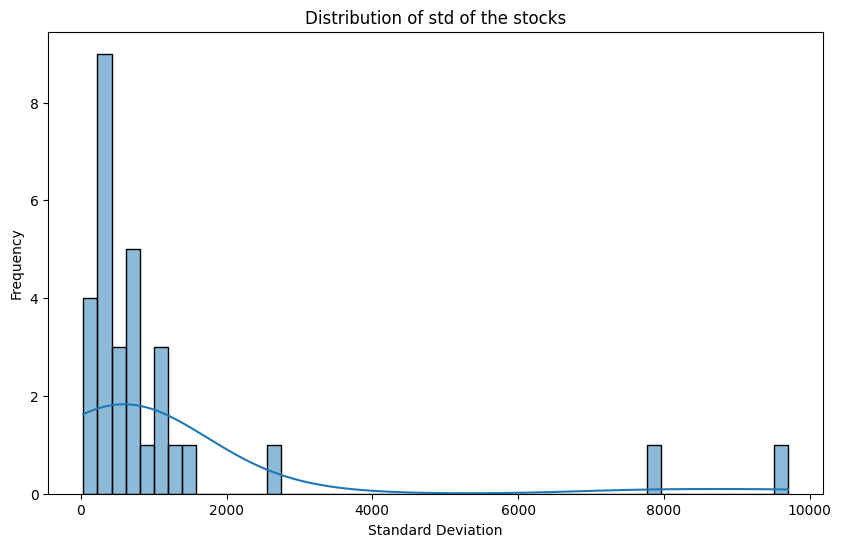

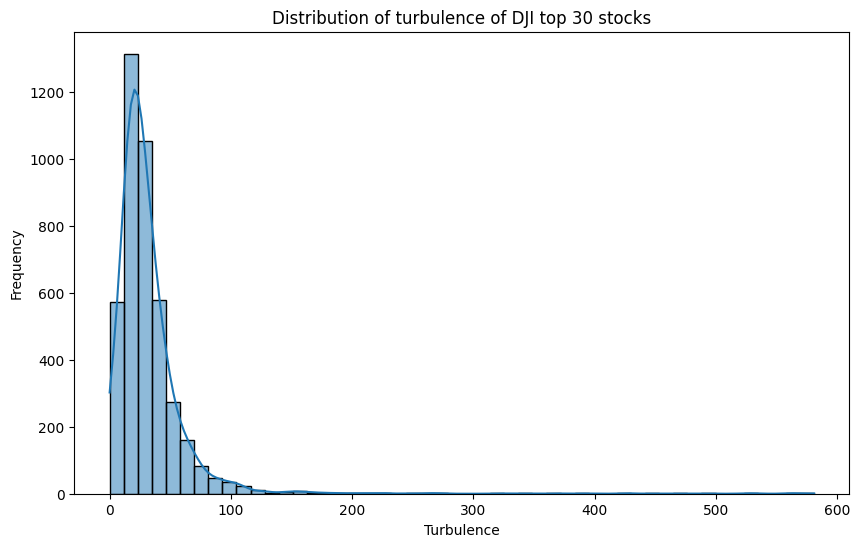

<Figure size 1500x500 with 0 Axes>

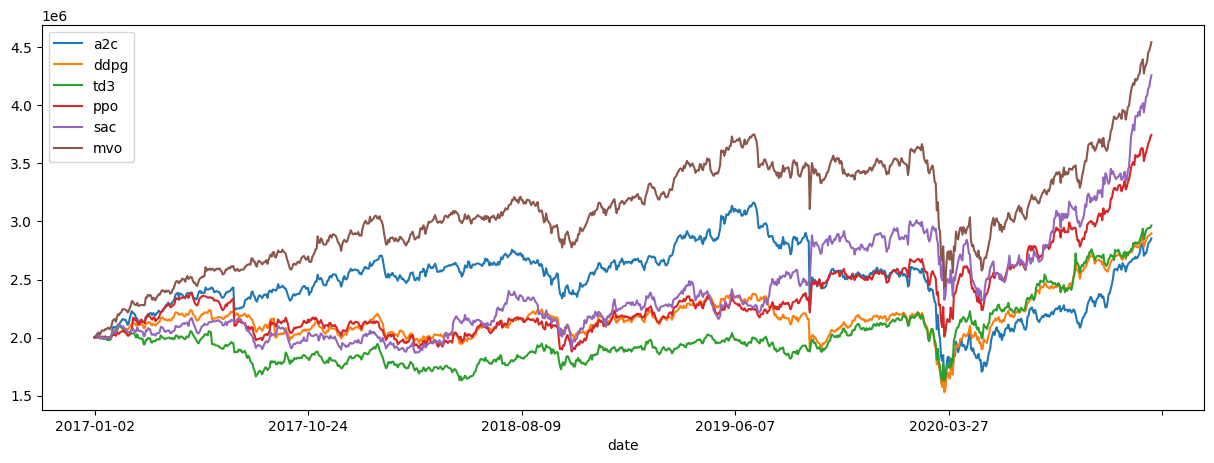

In [87]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (15,5)
plt.figure();
result.plot();

In [88]:
# make a table of initial and final value, annual return, sharpe ratio, max drawdown
# initial value
initial_value = result.iloc[0]
# final value
final_value = result.iloc[-1]
# annual return
annual_return = (final_value/initial_value)**(1/3) - 1
annual_return = annual_return * 100
# sharpe ratio
sharpe_ratio = annual_return / result.std()
# max drawdown
max_drawdown = (result - result.expanding().max()).min()
# combine all the metrics


In [89]:
# Calculate daily returns from the portfolio values
daily_returns = result.pct_change().dropna()

# Set target return (e.g., 0 for simplicity, or replace with a risk-free rate if needed)
target_return = 0

# Calculate downside deviation
downside_returns = daily_returns[daily_returns < target_return]  # Only returns below target
downside_deviation = np.sqrt((downside_returns**2).mean())  # Root mean square of negative returns

# Annual return (already calculated)
annual_return = (result.iloc[-1] / result.iloc[0])**(1/3) - 1
annual_return = annual_return * 100  # Convert to percentage

# Sortino Ratio
sortino_ratio = (annual_return - target_return) / downside_deviation

# # Create a DataFrame for Sortino Ratio
# sortino_ratio_df = pd.DataFrame(sortino_ratio, columns=['Sortino Ratio'])
# print(sortino_ratio_df)


In [90]:
metrics = pd.DataFrame([initial_value, final_value, annual_return, sharpe_ratio,sortino_ratio, max_drawdown], index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio','sortino_ratio', 'max_drawdown']).T

if os.name == 'nt':  # Windows
    # df_account_value_a2c.to_csv("NIFTY\df_account_value_a2c.csv")
    do_nothing = 0
else: # macOS/Linux
    metrics.to_csv("NIFTY/metrics_nifty.csv")
    
print(metrics)

      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.854302e+06      12.587443      0.000045     691.324930   
ddpg   2.000000e+06  2.898380e+06      13.164046      0.000068     962.509814   
td3    2.000000e+06  2.965545e+06      14.031505      0.000052    1137.379009   
ppo    2.000000e+06  3.746256e+06      23.269550      0.000067    1698.306071   
sac    2.000000e+06  4.259983e+06      28.664662      0.000065    2015.052903   
mvo    2.003918e+06  4.544976e+06      31.386452      0.000070    2167.596721   

      max_drawdown  
a2c  -1.552427e+06  
ddpg -8.734543e+05  
td3  -5.834626e+05  
ppo  -6.697892e+05  
sac  -6.903112e+05  
mvo  -1.318668e+06  


# Risk (Maximum Drawdown)
------------------------

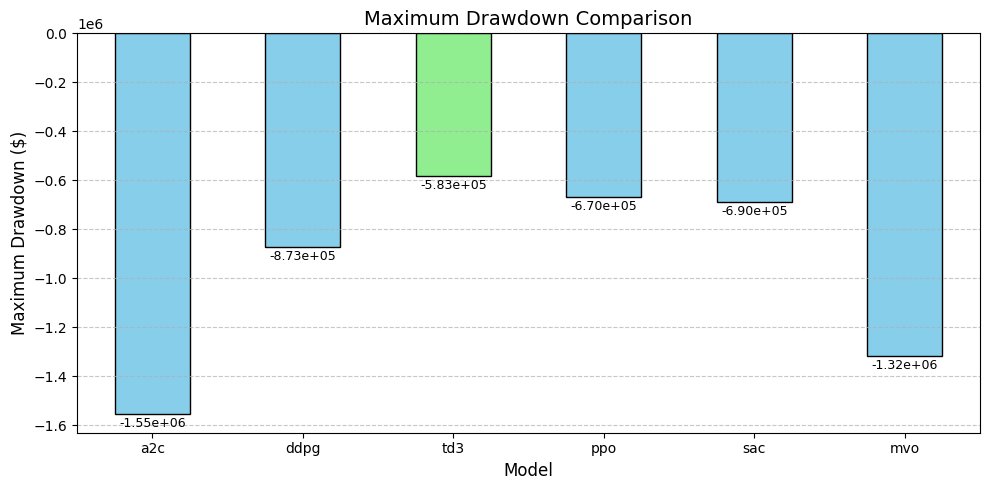

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created and saved
# metrics = pd.read_csv("metrics_cashless_snp500.csv", index_col=0)

# Calculate the maximum drawdowns from metrics
max_drawdowns = metrics['max_drawdown']

# Identify the index of the minimum absolute drawdown
min_drawdown_index = max_drawdowns.abs().idxmin()

# Define bar colors: light green for the lowest drawdown, sky blue for others
colors = ['lightgreen' if index == min_drawdown_index else 'skyblue' for index in max_drawdowns.index]

# Plot the maximum drawdowns
plt.figure(figsize=(10, 5))
max_drawdowns.plot(kind='bar', color=colors, edgecolor='black')

# Add titles and labels
plt.title('Maximum Drawdown Comparison', fontsize=14)
plt.ylabel('Maximum Drawdown ($)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(max_drawdowns):
    # Adjust the position of the text by subtracting a small offset
    offset = -0.025 * max_drawdowns.abs().max()  # 5% of the max absolute value as offset
    plt.text(index, value + offset, f'{value:.2e}', ha='center', va='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('max_drawdown_comparison.png', dpi=300)
plt.show()


# Profitability
------------------

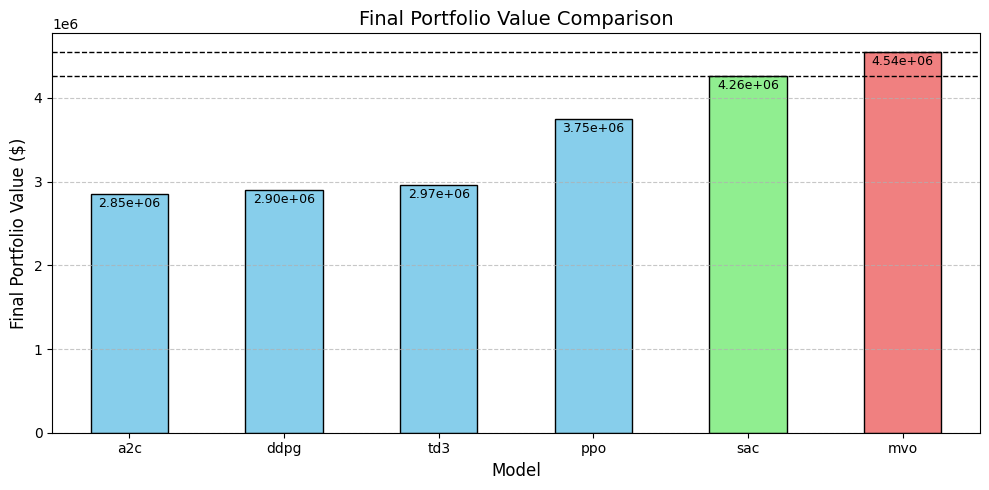

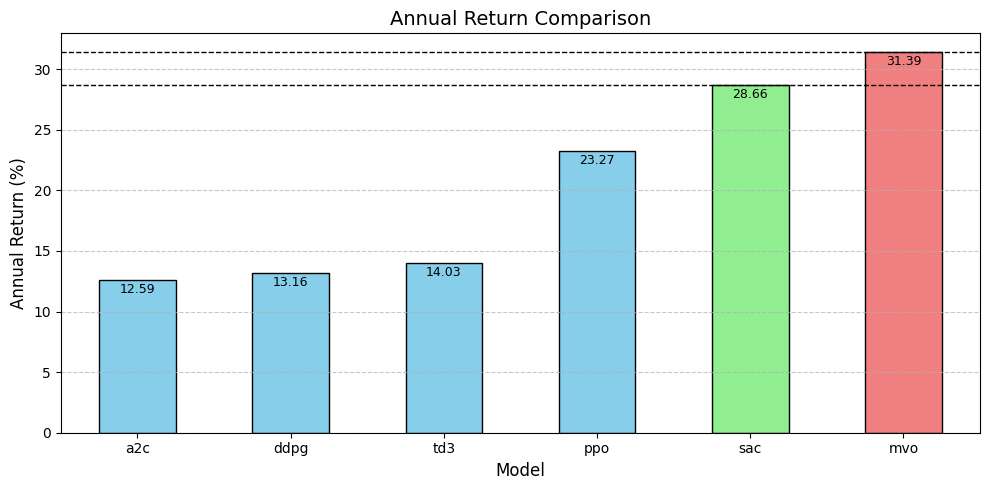

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created and saved

# Extract the final portfolio values and annual returns from metrics
final_values = metrics['final_value']
annual_returns = metrics['annual_return']

# Identify the index of the maximum and second maximum final value and annual return
max_final_value_index = final_values.idxmax()
second_max_final_value_index = final_values.nlargest(2).idxmin()
max_annual_return_index = annual_returns.idxmax()
second_max_annual_return_index = annual_returns.nlargest(2).idxmin()

# Define bar colors: light coral for the highest value, light green for the second highest, sky blue for others
colors_final_value = [
    'lightcoral' if index == max_final_value_index else 'lightgreen' if index == second_max_final_value_index else 'skyblue'
    for index in final_values.index
]
colors_annual_return = [
    'lightcoral' if index == max_annual_return_index else 'lightgreen' if index == second_max_annual_return_index else 'skyblue'
    for index in annual_returns.index
]

# Plot the final portfolio values
plt.figure(figsize=(10, 5))
final_values.plot(kind='bar', color=colors_final_value, edgecolor='black')

# Add titles and labels
plt.title('Final Portfolio Value Comparison', fontsize=14)
plt.ylabel('Final Portfolio Value ($)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(final_values):
    offset = -0.025 * final_values.max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2e}', ha='center', va='center', fontsize=9)

# Draw black dotted lines for the highest and second-highest final values
plt.axhline(y=final_values[max_final_value_index], color='black', linestyle='--', linewidth=1)
plt.axhline(y=final_values[second_max_final_value_index], color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('final_value_comparison.png', dpi=300)
plt.show()

# Plot the annual returns
plt.figure(figsize=(10, 5))
annual_returns.plot(kind='bar', color=colors_annual_return, edgecolor='black')

# Add titles and labels
plt.title('Annual Return Comparison', fontsize=14)
plt.ylabel('Annual Return (%)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(annual_returns):
    offset = -0.025 * annual_returns.max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Draw black dotted lines for the highest and second-highest annual returns
plt.axhline(y=annual_returns[max_annual_return_index], color='black', linestyle='--', linewidth=1)
plt.axhline(y=annual_returns[second_max_annual_return_index], color='black', linestyle='--', linewidth=1)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('annual_return_comparison.png', dpi=300)
plt.show()


# Consistency (Volatility of Returns)
------------------------

In [93]:
# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Count the number of trading days per year
trading_days_per_year = df.groupby('year')['date'].nunique()

# Display the result
print(trading_days_per_year)


year
2000    250
2001    248
2002    251
2003    254
2004    254
2005    251
2006    250
2007    249
2008    246
2009    243
2010    252
2011    247
2012    251
2013    250
2014    244
2015    248
2016    247
2017    248
2018    246
2019    245
2020    252
Name: date, dtype: int64


In [94]:
# Calculate daily returns
daily_returns = result.pct_change().dropna()

# Calculate annualized volatility
volatility = daily_returns.std() * np.sqrt(252)  # 252 trading days assumed for a year

# Add volatility to metrics DataFrame
metrics = pd.DataFrame(
    [initial_value, final_value, annual_return, sharpe_ratio, sortino_ratio, max_drawdown, volatility],
    index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio', 'sortino_ratio', 'max_drawdown', 'volatility']
).T

# Save and display metrics
metrics.to_csv("metrics_cashless_snp500.csv")
print(metrics)




      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.854302e+06      12.587443      0.000045     691.324930   
ddpg   2.000000e+06  2.898380e+06      13.164046      0.000068     962.509814   
td3    2.000000e+06  2.965545e+06      14.031505      0.000052    1137.379009   
ppo    2.000000e+06  3.746256e+06      23.269550      0.000067    1698.306071   
sac    2.000000e+06  4.259983e+06      28.664662      0.000065    2015.052903   
mvo    2.003918e+06  4.544976e+06      31.386452      0.000070    2167.596721   

      max_drawdown  volatility  
a2c  -1.552427e+06    0.251280  
ddpg -8.734543e+05    0.202814  
td3  -5.834626e+05    0.202553  
ppo  -6.697892e+05    0.209474  
sac  -6.903112e+05    0.239344  
mvo  -1.318668e+06    0.211541  


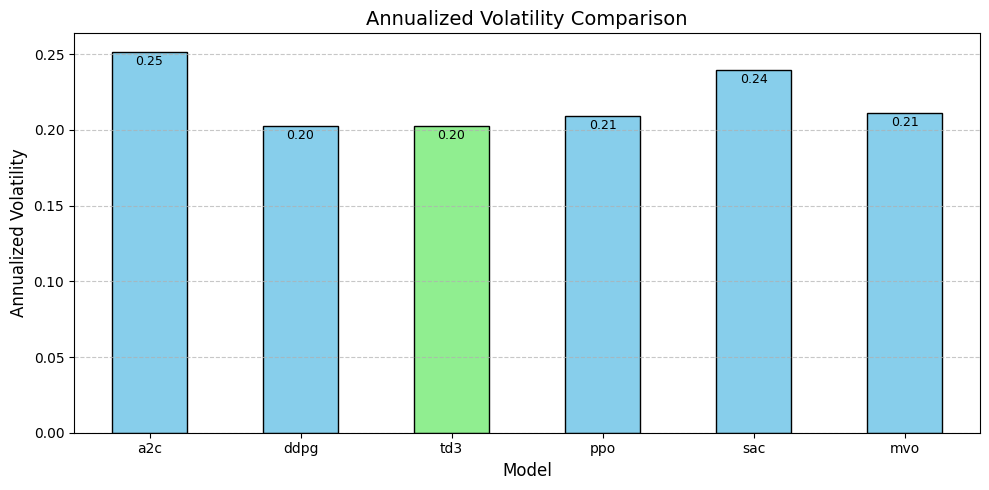

In [95]:
# Define bar colors: light green for the lowest value, sky blue for others
colors_volatility = ['lightgreen' if value == metrics['volatility'].min() else 'skyblue' for value in metrics['volatility']]

# Plot the volatility comparison
plt.figure(figsize=(10, 5))
metrics['volatility'].plot(kind='bar', color=colors_volatility, edgecolor='black')

# Add titles and labels
plt.title('Annualized Volatility Comparison', fontsize=14)
plt.ylabel('Annualized Volatility', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Add grid for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['volatility']):
    offset = -0.025 * metrics['volatility'].max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('volatility_comparison.png', dpi=300)
plt.show()


# Aggresiveness
--------------

In [96]:
# Calculate profitability
profitability = metrics['final_value'] - metrics['initial_value']

# Calculate aggressiveness
aggressiveness = profitability / metrics['max_drawdown']

# Add aggressiveness to metrics DataFrame
metrics = pd.DataFrame(
    [initial_value, final_value, annual_return, sharpe_ratio, sortino_ratio, max_drawdown, volatility, profitability, aggressiveness],
    index=['initial_value', 'final_value', 'annual_return', 'sharpe_ratio', 'sortino_ratio', 'max_drawdown', 'volatility', 'profitability', 'aggressiveness']
).T

# Save and display metrics
# metrics.to_csv("metrics_cashless_snp500.csv")
print(metrics)



      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.854302e+06      12.587443      0.000045     691.324930   
ddpg   2.000000e+06  2.898380e+06      13.164046      0.000068     962.509814   
td3    2.000000e+06  2.965545e+06      14.031505      0.000052    1137.379009   
ppo    2.000000e+06  3.746256e+06      23.269550      0.000067    1698.306071   
sac    2.000000e+06  4.259983e+06      28.664662      0.000065    2015.052903   
mvo    2.003918e+06  4.544976e+06      31.386452      0.000070    2167.596721   

      max_drawdown  volatility  profitability  aggressiveness  
a2c  -1.552427e+06    0.251280   8.543016e+05       -0.550301  
ddpg -8.734543e+05    0.202814   8.983805e+05       -1.028537  
td3  -5.834626e+05    0.202553   9.655453e+05       -1.654854  
ppo  -6.697892e+05    0.209474   1.746256e+06       -2.607172  
sac  -6.903112e+05    0.239344   2.259983e+06       -3.273861  
mvo  -1.318668e+06    0.211541   2.541059e+06   

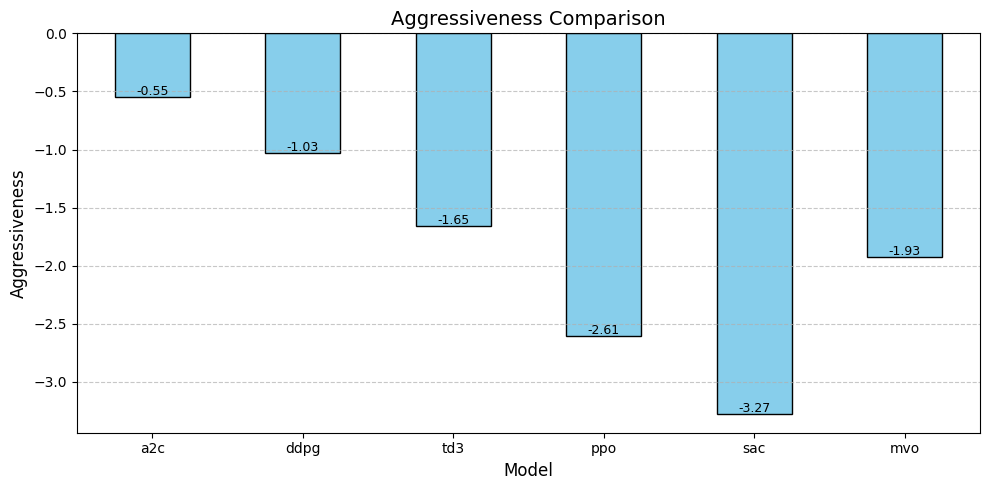

In [97]:
# Plot the aggressiveness comparison
plt.figure(figsize=(10, 5))
metrics['aggressiveness'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Aggressiveness Comparison', fontsize=14)
plt.ylabel('Aggressiveness', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['aggressiveness']):
    offset = -0.085 * metrics['aggressiveness'].max()  # 2.5% of the max value as offset
    plt.text(index, value + offset, f'{value:.2f}', ha='center', va='center', fontsize=9)

# Show grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('aggressiveness_comparison.png', dpi=300)
plt.show()


# Drawdown Recovery Time
-------------------------

In [98]:
# calculate drawdown recovery time for a2c using df_account_value_a2c

# 1. identift maximum and minimum portfolio value
max_portfolio_value = df_account_value_a2c['account_value'].max()
min_portfolio_value = df_account_value_a2c['account_value'].min()

# 2. calculate drawdown
drawdown = (max_portfolio_value - min_portfolio_value)

# 3. Find recovery date
recovery_date = df_account_value_a2c[df_account_value_a2c['account_value'] == max_portfolio_value].index[0]

# 4. Find lowest point date
lowest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == min_portfolio_value].index[0]

# 5. Find drawdown recovery time
drawdown_recovery_time = recovery_date - lowest_point_date

# 6. Display the dates
print(f"Lowest Point Date: {lowest_point_date}")
print(f"Recovery Date: {recovery_date}")

# 7. Display the drawdown and recovery time
print(f"Drawdown: {drawdown:.2f}")
print(f"Drawdown Recovery Time: {drawdown_recovery_time} days")








Lowest Point Date: 797
Recovery Date: 618
Drawdown: 1552427.29
Drawdown Recovery Time: -179 days


In [99]:
from datetime  import datetime

# 1. Identifying maximum and minimum portfolio value
max_portfolio_value = df_account_value_a2c['account_value'].max()
min_portfolio_value = df_account_value_a2c['account_value'].min()

# 2. Calculate drawdown
drawdown = (max_portfolio_value - min_portfolio_value)

# 3. Find recovery date
highest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == max_portfolio_value]['date'].iloc[0]

# 4. Find lowest point date
lowest_point_date = df_account_value_a2c[df_account_value_a2c['account_value'] == min_portfolio_value]['date'].iloc[0]

# 5. Find drawdown recovery time (in days)

# Convert strings to datetime objects
highest_point_date_dt = datetime.strptime(highest_point_date, '%Y-%m-%d')
lowest_point_date_dt = datetime.strptime(lowest_point_date, '%Y-%m-%d')
# Calculate the difference in days
days_difference = (highest_point_date_dt - lowest_point_date_dt).days

print(f"Lowest Point Date: {lowest_point_date}")
print(f"Highest Point Date: {highest_point_date}")
print(f"Drawdown Recovery Time: {days_difference} days")


Lowest Point Date: 2020-03-24
Highest Point Date: 2019-07-03
Drawdown Recovery Time: -265 days


In [100]:
from datetime import datetime

def calculate_recovery_time(arg_df, algorithm_name):
    

    # 1. Identifying maximum and minimum portfolio value
    max_portfolio_value = arg_df['account_value'].max()
    min_portfolio_value = arg_df['account_value'].min()

    # 2. Calculate drawdown
    drawdown = max_portfolio_value - min_portfolio_value

    # 3. Find recovery date
    highest_point_date = arg_df[arg_df['account_value'] == max_portfolio_value]['date'].iloc[0]


    # 4. Find lowest point date
    lowest_point_date = arg_df[arg_df['account_value'] == min_portfolio_value]['date'].iloc[0]

    # 5. Find drawdown recovery time (in days)
    highest_point_date_dt = datetime.strptime(highest_point_date, '%Y-%m-%d')
    lowest_point_date_dt = datetime.strptime(lowest_point_date, '%Y-%m-%d')

    # Calculate the difference in days
    drt = (highest_point_date_dt - lowest_point_date_dt).days

    return {
        'algorithm': algorithm_name,
        'drawdown': drawdown,
        'max_portfolio_value': max_portfolio_value,
        'highest_point_date': highest_point_date,
        'min_portfolio_value': min_portfolio_value,
        'lowest_point_date': lowest_point_date,
        'recovery_time': drt
    }

# Example usage for PPO
ppo_recovery = calculate_recovery_time(df_account_value_ppo, 'ppo')
print(ppo_recovery)



{'algorithm': 'ppo', 'drawdown': 1867929.772275, 'max_portfolio_value': 3746255.8200000003, 'highest_point_date': '2020-12-31', 'min_portfolio_value': 1878326.0477250002, 'lowest_point_date': '2018-10-23', 'recovery_time': 800}


In [101]:

copy_result = result.copy()
df_account_value_mvo_temp = copy_result.drop(columns=['a2c', 'ddpg', 'td3', 'ppo', 'sac'])
df_account_value_mvo_temp 


,mvo
date,
2017-01-02,2.003918e+06
2017-01-03,2.012231e+06
2017-01-04,2.025332e+06
2017-01-05,2.038291e+06
2017-01-06,2.043037e+06
...,...
2020-12-24,4.380111e+06
2020-12-28,4.454658e+06
2020-12-29,4.471348e+06


In [102]:
df_account_value_mvo = df_account_value_mvo_temp.reset_index()  # Reset the index to convert dates to a column
df_account_value_mvo.columns = ['date', 'account_value']  # Rename the columns
df_account_value_mvo

,date,account_value
0,2017-01-02,2.003918e+06
1,2017-01-03,2.012231e+06
2,2017-01-04,2.025332e+06
3,2017-01-05,2.038291e+06
4,2017-01-06,2.043037e+06
...,...,...
986,2020-12-24,4.380111e+06
987,2020-12-28,4.454658e+06
988,2020-12-29,4.471348e+06
989,2020-12-30,4.505411e+06


In [103]:
a2c_recovery = calculate_recovery_time(df_account_value_a2c, 'a2c')
ddpg_recovery = calculate_recovery_time(df_account_value_ddpg, 'ddpg')
td3_recovery = calculate_recovery_time(df_account_value_td3, 'td3')
ppo_recovery = calculate_recovery_time(df_account_value_ppo, 'ppo')
sac_recovery = calculate_recovery_time(df_account_value_sac, 'sac')
mvo_recovery = calculate_recovery_time(df_account_value_mvo, 'mvo')

# Display the recovery time for each model
print(a2c_recovery)
print(ddpg_recovery)
print(td3_recovery)
print(ppo_recovery)
print(sac_recovery)
print(mvo_recovery)


{'algorithm': 'a2c', 'drawdown': 1552427.2926, 'max_portfolio_value': 3162730.279450001, 'highest_point_date': '2019-07-03', 'min_portfolio_value': 1610302.9868500012, 'lowest_point_date': '2020-03-24', 'recovery_time': -265}
{'algorithm': 'ddpg', 'drawdown': 1369674.65, 'max_portfolio_value': 2898380.4501500004, 'highest_point_date': '2020-12-31', 'min_portfolio_value': 1528705.8001500005, 'lowest_point_date': '2020-03-23', 'recovery_time': 283}
{'algorithm': 'td3', 'drawdown': 1337458.4000000001, 'max_portfolio_value': 2965545.2935, 'highest_point_date': '2020-12-31', 'min_portfolio_value': 1628086.8935, 'lowest_point_date': '2020-03-19', 'recovery_time': 287}
{'algorithm': 'ppo', 'drawdown': 1867929.772275, 'max_portfolio_value': 3746255.8200000003, 'highest_point_date': '2020-12-31', 'min_portfolio_value': 1878326.0477250002, 'lowest_point_date': '2018-10-23', 'recovery_time': 800}
{'algorithm': 'sac', 'drawdown': 2391055.501, 'max_portfolio_value': 4259982.767225, 'highest_point_d

In [104]:
# make a array of all the recovery time
recovery_times = [a2c_recovery['recovery_time'], ddpg_recovery['recovery_time'], td3_recovery['recovery_time'], ppo_recovery['recovery_time'], sac_recovery['recovery_time'], mvo_recovery['recovery_time']]
recovery_times

[-265, 283, 287, 800, 1018, 1459]

In [105]:
metrics['recovery_time'] = recovery_times
# metrics.to_csv("metrics_cashless_snp500.csv")

metrics 

,initial_value,final_value,annual_return,sharpe_ratio,sortino_ratio,max_drawdown,volatility,profitability,aggressiveness,recovery_time
a2c,2.000000e+06,2.854302e+06,12.587443,0.000045,691.324930,-1.552427e+06,0.251280,8.543016e+05,-0.550301,-265
ddpg,2.000000e+06,2.898380e+06,13.164046,0.000068,962.509814,-8.734543e+05,0.202814,8.983805e+05,-1.028537,283
td3,2.000000e+06,2.965545e+06,14.031505,0.000052,1137.379009,-5.834626e+05,0.202553,9.655453e+05,-1.654854,287
ppo,2.000000e+06,3.746256e+06,23.269550,0.000067,1698.306071,-6.697892e+05,0.209474,1.746256e+06,-2.607172,800
sac,2.000000e+06,4.259983e+06,28.664662,0.000065,2015.052903,-6.903112e+05,0.239344,2.259983e+06,-3.273861,1018
mvo,2.003918e+06,4.544976e+06,31.386452,0.000070,2167.596721,-1.318668e+06,0.211541,2.541059e+06,-1.926989,1459


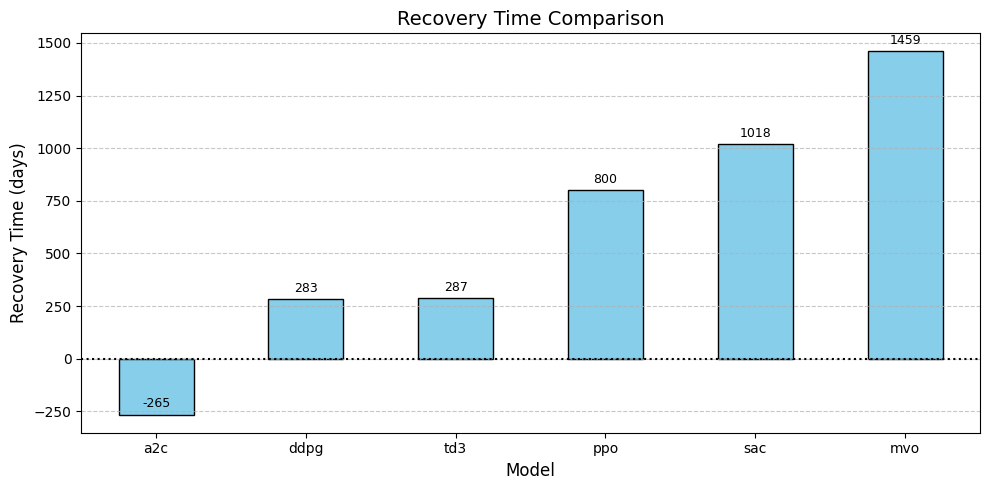

In [106]:
# Plot the recovery time comparison
plt.figure(figsize=(10, 5))
metrics['recovery_time'].plot(kind='bar', color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Recovery Time Comparison', fontsize=14)
plt.ylabel('Recovery Time (days)', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)

# Annotate bars with values, slightly shifting the labels down
for index, value in enumerate(metrics['recovery_time']):
    offset = 0.035 * metrics['recovery_time'].max()  # 3.5% of the max value as offset
    plt.text(index, value + offset, f'{value}', ha='center', va='center', fontsize=9)

# Add a red dotted line across y=0
plt.axhline(y=0, color='black', linestyle='dotted', linewidth=1.5)

# Show grid for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show or save the plot
# plt.savefig('recovery_time_comparison.png', dpi=300)
plt.show()


# HeatMap
----------

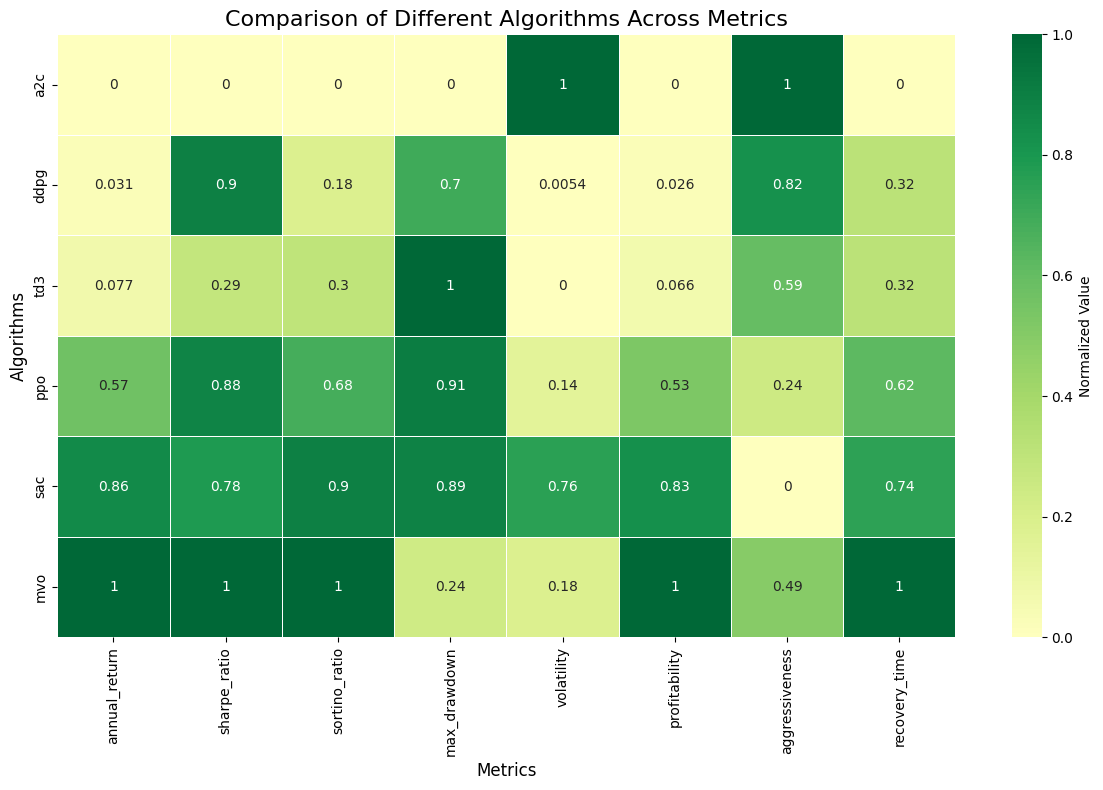

In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming metrics DataFrame is already created
# metrics = pd.read_csv("metrics_cashless_snp500.csv")

# Selecting relevant columns for heatmap
metrics_subset = metrics[['annual_return', 'sharpe_ratio', 'sortino_ratio', 
                         'max_drawdown', 'volatility', 'profitability', 
                         'aggressiveness', 'recovery_time']]

# Normalize data if needed
metrics_normalized = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(metrics_normalized, annot=True, cmap='RdYlGn', center=0,
                      cbar_kws={'label': 'Normalized Value'},
                      linewidths=0.5)

# Title and labels
plt.title('Comparison of Different Algorithms Across Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Algorithms', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


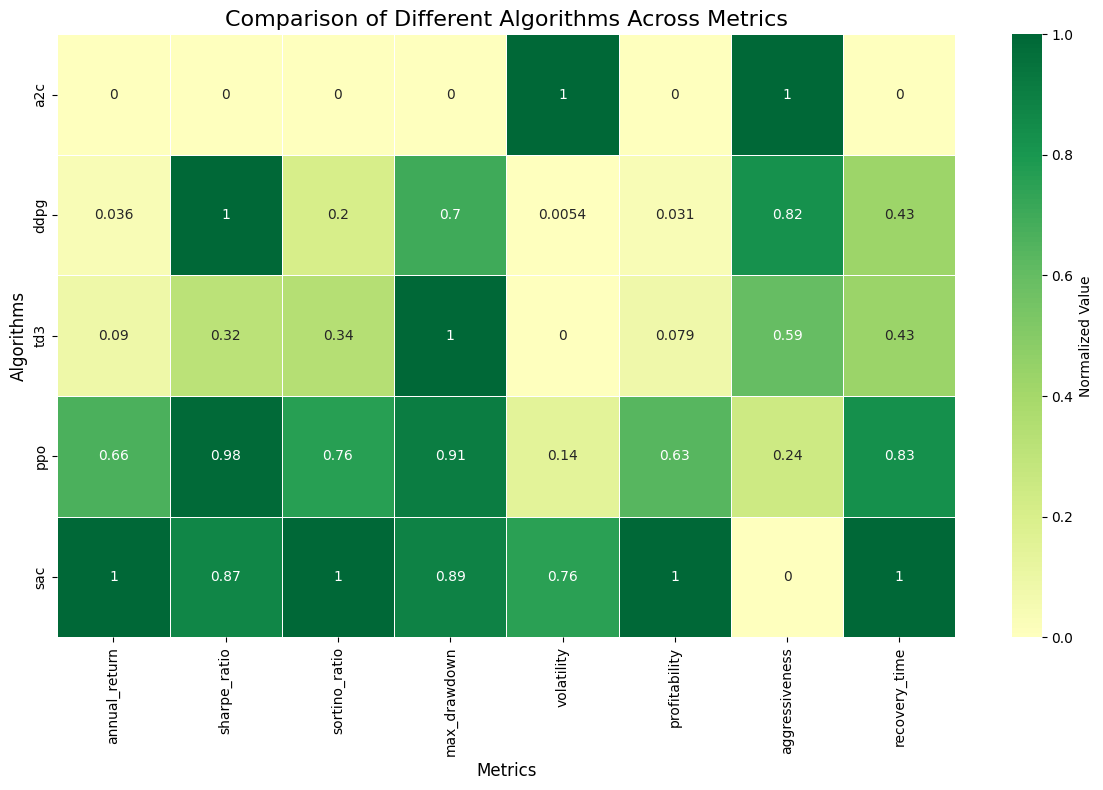

In [108]:
# create the same heatmap but without the mvo model

# Selecting relevant columns for heatmap
metrics_subset = metrics[['annual_return', 'sharpe_ratio', 'sortino_ratio', 
                         'max_drawdown', 'volatility', 'profitability', 
                         'aggressiveness', 'recovery_time']].drop('mvo')

# Normalize data if needed
metrics_normalized = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(metrics_normalized, annot=True, cmap='RdYlGn', center=0,
                      cbar_kws={'label': 'Normalized Value'},
                      linewidths=0.5)

# Title and labels
plt.title('Comparison of Different Algorithms Across Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Algorithms', fontsize=12)

# Display plot
plt.tight_layout()
plt.show()


# Radar Plot
----------------

In [109]:
print(metrics) 
# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

metrics_subset = metrics.loc[algorithms, ['final_value','annual_return', 'sharpe_ratio', 'sortino_ratio', 
                                          'max_drawdown', 'volatility', 'profitability', 
                                          'aggressiveness', 'recovery_time']]

metrics_subset



      initial_value   final_value  annual_return  sharpe_ratio  sortino_ratio  \
a2c    2.000000e+06  2.854302e+06      12.587443      0.000045     691.324930   
ddpg   2.000000e+06  2.898380e+06      13.164046      0.000068     962.509814   
td3    2.000000e+06  2.965545e+06      14.031505      0.000052    1137.379009   
ppo    2.000000e+06  3.746256e+06      23.269550      0.000067    1698.306071   
sac    2.000000e+06  4.259983e+06      28.664662      0.000065    2015.052903   
mvo    2.003918e+06  4.544976e+06      31.386452      0.000070    2167.596721   

      max_drawdown  volatility  profitability  aggressiveness  recovery_time  
a2c  -1.552427e+06    0.251280   8.543016e+05       -0.550301           -265  
ddpg -8.734543e+05    0.202814   8.983805e+05       -1.028537            283  
td3  -5.834626e+05    0.202553   9.655453e+05       -1.654854            287  
ppo  -6.697892e+05    0.209474   1.746256e+06       -2.607172            800  
sac  -6.903112e+05    0.239344   2.25

,final_value,annual_return,sharpe_ratio,sortino_ratio,max_drawdown,volatility,profitability,aggressiveness,recovery_time
a2c,2.854302e+06,12.587443,0.000045,691.324930,-1.552427e+06,0.251280,8.543016e+05,-0.550301,-265
ddpg,2.898380e+06,13.164046,0.000068,962.509814,-8.734543e+05,0.202814,8.983805e+05,-1.028537,283
td3,2.965545e+06,14.031505,0.000052,1137.379009,-5.834626e+05,0.202553,9.655453e+05,-1.654854,287
ppo,3.746256e+06,23.269550,0.000067,1698.306071,-6.697892e+05,0.209474,1.746256e+06,-2.607172,800
sac,4.259983e+06,28.664662,0.000065,2015.052903,-6.903112e+05,0.239344,2.259983e+06,-3.273861,1018
mvo,4.544976e+06,31.386452,0.000070,2167.596721,-1.318668e+06,0.211541,2.541059e+06,-1.926989,1459


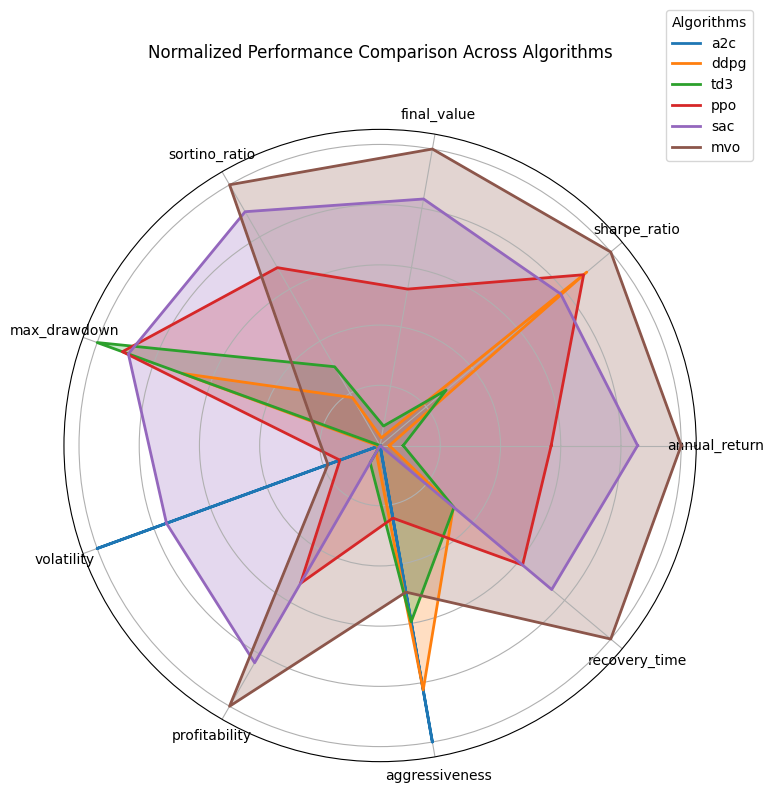

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac', 'mvo']

# Extract metrics for all algorithms
metrics_subset = metrics.loc[algorithms, ['annual_return', 'sharpe_ratio'   , 'final_value', 
                                          'sortino_ratio', 'max_drawdown'   , 'volatility', 
                                          'profitability', 'aggressiveness' , 'recovery_time']]

# Normalize metrics
metrics_norm = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Number of variables
num_vars = len(metrics_norm.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each algorithm
for algo, color in zip(algorithms, colors):
    metrics_values = metrics_norm.loc[algo].values.tolist()
    metrics_values += metrics_values[:1]  # Close the circle

    # Plot
    ax.plot(angles, metrics_values, linewidth=2, linestyle='solid', color=color, label=algo)

    # Fill area
    ax.fill(angles, metrics_values, color=color, alpha=0.25)

# Customize
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_norm.columns.tolist(), fontsize=10)

# Legend with adjusted position
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.20), fontsize=10, title="Algorithms")

# Title
plt.title('Normalized Performance Comparison Across Algorithms', fontsize=12, y=1.10)

# Show plot
plt.tight_layout()
plt.show()


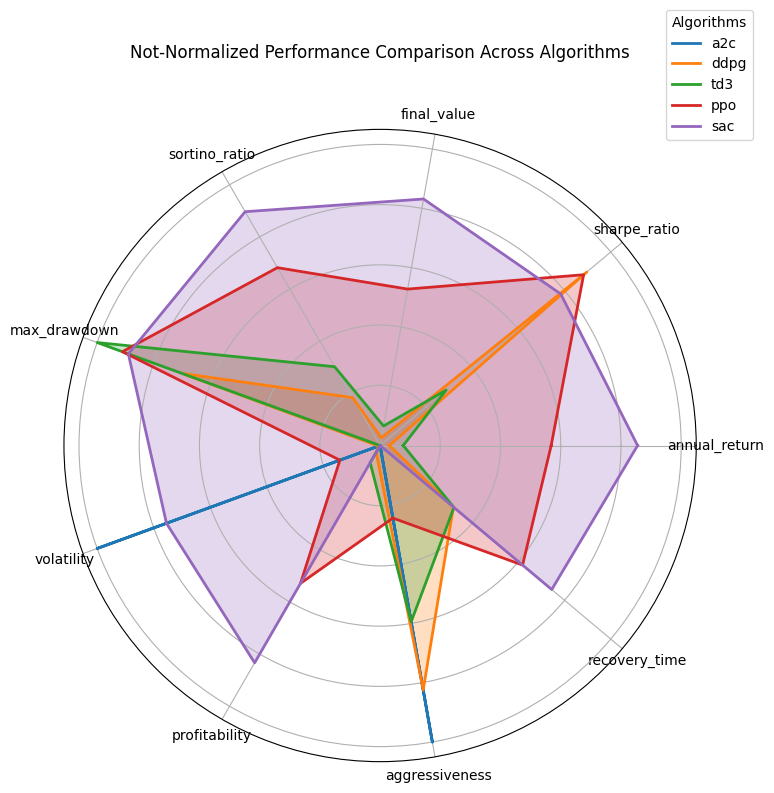

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import pi

# Assuming metrics DataFrame
algorithms = ['a2c', 'ddpg', 'td3', 'ppo', 'sac']

# Extract metrics for all algorithms
metrics_subset = metrics.loc[algorithms, ['annual_return', 'sharpe_ratio'   , 'final_value', 
                                          'sortino_ratio', 'max_drawdown'   , 'volatility', 
                                          'profitability', 'aggressiveness' , 'recovery_time']]

# # Normalize metrics
# metrics_norm = (metrics_subset - metrics_subset.min()) / (metrics_subset.max() - metrics_subset.min())

# Number of variables
num_vars = len(metrics_norm.columns)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Colors for each algorithm
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot each algorithm
for algo, color in zip(algorithms, colors):
    metrics_values = metrics_norm.loc[algo].values.tolist()
    metrics_values += metrics_values[:1]  # Close the circle

    # Plot
    ax.plot(angles, metrics_values, linewidth=2, linestyle='solid', color=color, label=algo)

    # Fill area
    ax.fill(angles, metrics_values, color=color, alpha=0.25)

# Customize
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(metrics_norm.columns.tolist(), fontsize=10)

# Legend with adjusted position
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.20), fontsize=10, title="Algorithms")

# Title
plt.title('Not-Normalized Performance Comparison Across Algorithms', fontsize=12, y=1.10)

# Show plot
plt.tight_layout()
plt.show()
